# The Android App Market on Google Play

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/adamelliotfields/datacamp/blob/main/notebooks/projects/android_app_market/notebook.ipynb)
[![Render nbviewer](https://raw.githubusercontent.com/jupyter/design/main/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/adamelliotfields/datacamp/blob/main/notebooks/projects/android_app_market/notebook.ipynb)

**Contents**
- [Google Play Store Apps and Reviews](#Google-Play-Store-Apps-and-Reviews)
- [Data Cleaning](#Data-Cleaning)
- [Correcting Data Types](#Correcting-Data-Types)
- [Exploring App Categories](#Exploring-App-Categories)
- [Distribution of App Ratings](#Distribution-of-App-Ratings)
- [Size and Price of an App](#Size-and-Price-of-an-App)
- [Relation Between App Category and App Price](#Relation-Between-App-Category-and-App-Price)
- [Filtering out Junk Apps](#Filtering-out-Junk-Apps)
- [Popularity of Paid Apps vs Free Apps](#Popularity-of-Paid-Apps-vs-Free-Apps)
- [Sentiment Analysis of User Reviews](#Sentiment-Analysis-of-User-Reviews)

In [1]:
%matplotlib inline

import plotly
import warnings

plotly.offline.init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns

pd.set_option('display.width', 200)
warnings.filterwarnings('ignore')

apps = pd.read_csv('apps.csv')
reviews = pd.read_csv('reviews.csv')


## Google Play Store Apps and Reviews

Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.

Let's take a look at the data, which consists of two files:
* `apps.csv`: contains all the details of the applications on Google Play. There are 13 features that describe a given app.
* `user_reviews.csv`: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

In [2]:
# drop duplicates
apps = apps.drop_duplicates()

print(f"Total number of apps in the dataset = {len(apps)}")
print(apps.sample(5))


Total number of apps in the dataset = 9659
                                App          Category  Rating  Reviews  Size    Installs  Type  Price Content Rating            Genres    Last Updated         Current Ver         Android Ver
6442  Fu*** Weather (Funny Weather)           WEATHER     4.7    20001   NaN  1,000,000+  Free      0     Mature 17+           Weather   July 26, 2018  Varies with device  Varies with device
3408           Preschool All-In-One            FAMILY     4.1     9019  44.0  1,000,000+  Free      0       Everyone  Casual;Education  March 28, 2018                 6.6          4.0 and up
3228            Broken Screen Prank            FAMILY     3.3    23682   9.8  1,000,000+  Free      0           Teen            Casual   June 14, 2018                 6.2          4.0 and up
4841                 Woodman Deluxe              GAME     4.0       82   4.4      5,000+  Free      0       Everyone            Action    July 6, 2015               1.0.2          2.3 and up
87

## Data Cleaning

Data cleaning is one of the most essential subtask for any data science project. Although it can be a very tedious process, it's worth should never be undermined.

By looking at a random sample of the dataset rows (from the above task), we observe that some entries in the columns like `Installs` and `Price` have a few special characters (`+`, `,`, `$`) due to the way the numbers have been represented. This prevents the columns from being purely numeric, making it difficult to use them in subsequent future mathematical calculations. Ideally, as their names suggest, we would want these columns to contain only digits from `[0-9]`.

Hence, we now proceed to clean our data. Specifically, the special characters `+` and `,` present in `Installs` column and `$` present in Price column need to be removed.

It is also always a good practice to print a summary of your dataframe after completing data cleaning. We will use the `info()` method to acheive this.

In [3]:
# list of characters to remove and column names to clean
chars_to_remove = ["+", ",", "$"]
cols_to_clean = ["Installs", "Price"]

for col in cols_to_clean:
    for char in chars_to_remove:
        apps[col] = apps[col].apply(lambda x: x.replace(char, ""))

print(apps.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 981.1+ KB
None


## Correcting Data Types

From the previous task we noticed that `Installs` and `Price` were categorized as `object` data type (and not `int` or `float`) as we would like. This is because these two columns originally had mixed input types: digits and special characters. To know more about Pandas data types, read [this](https://datacarpentry.org/python-ecology-lesson/04-data-types-and-format).

The four features that we will be working with most frequently henceforth are `Installs`, `Size`, `Rating` and `Price`. While `Size` and `Rating` are both `float` (i.e. purely numerical data types), we still need to work on `Installs` and `Price` to make them numeric.

In [4]:
# convert `Installs` and `Price` to float
apps["Installs"] = apps["Installs"].astype(float)
apps["Price"] = apps["Price"].astype(float)

print(apps.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   float64
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 981.1+ KB
None


## Exploring App Categories

With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.

This brings us to the following questions:
- Which category has the highest share of (active) apps in the market?
- Is any specific category dominating the market?
- Which categories have the fewest number of apps?

We will see that there are 33 unique app categories present in our dataset. *Family* and *Game* apps have the highest market prevalence. Interestingly, *Tools*, *Business* and *Medical* apps are also at the top.

In [5]:
# print total unique categories
num_categories = len(apps["Category"].unique())
print(f"Number of categories = {num_categories}")

# count apps in each category sorted in descending order
sorted_num_apps_in_category = apps["Category"].value_counts().sort_values(ascending=False)

# plot number of apps in each category
data = [
    go.Bar(
        x=sorted_num_apps_in_category.index,  # index = category name
        y=sorted_num_apps_in_category.values,  # value = count
    )
]
plotly.offline.iplot(data)


Number of categories = 33


## Distribution of App Ratings

After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.

From our research, we found that the average volume of ratings across all app categories is `4.17`. The histogram plot is skewed to the left indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

In [6]:
# average rating of apps
avg_app_rating = apps["Rating"].mean()
print(f"Average app rating = {avg_app_rating}")

# distribution of apps by rating
data = [go.Histogram(x=apps["Rating"])]

# use a vertical dashed line to indicate the average app rating
layout = {
    "shapes": [
        {
            "type": "line",
            "x0": avg_app_rating,
            "y0": 0,
            "x1": avg_app_rating,
            "y1": 1000,
            "line": {"dash": "dashdot"},
        }
    ]
}
plotly.offline.iplot({"data": data, "layout": layout})


Average app rating = 4.173243045387994


## Size and Price of an App

Let's now examine app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.

How can we effectively come up with strategies to size and price our app?
- Does the size of an app affect its rating?
- Do users really care about system-heavy apps or do they prefer light-weighted apps?
- Does the price of an app affect its rating?
- Do users always prefer free apps over paid apps?

We find that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. We also find that the vast majority of apps price themselves under $10.

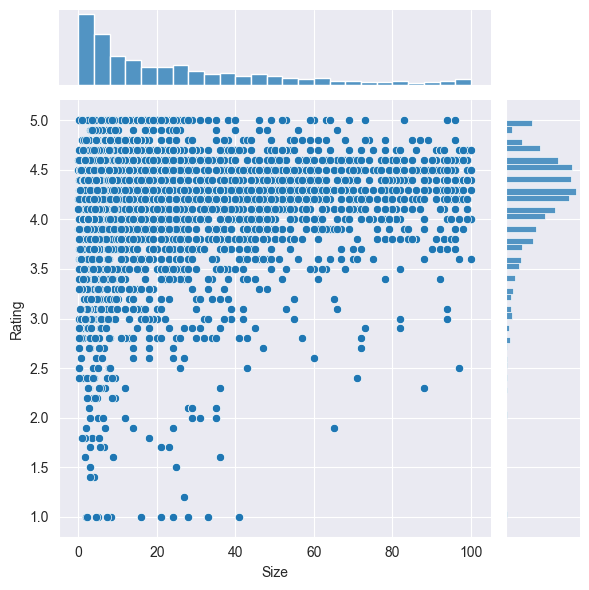

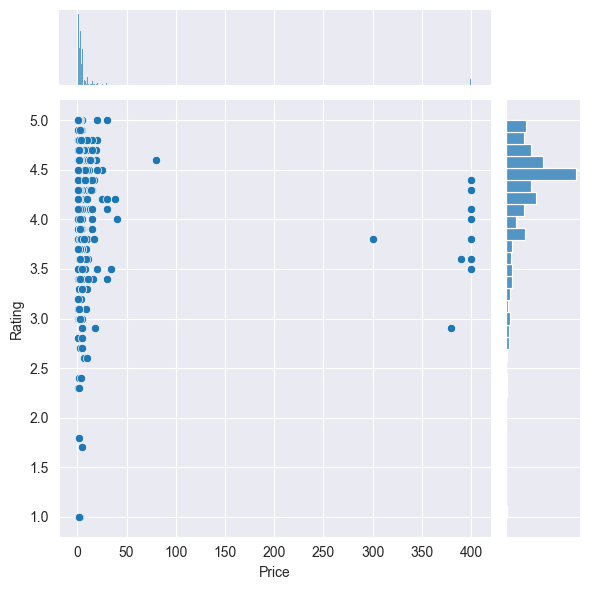

In [7]:
# select rows where both `Rating` and `Size` values are present
apps_with_size_and_rating_present = apps[(~apps["Rating"].isnull()) & (~apps["Size"].isnull())]

# select apps whose `Type` is "Paid"
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present["Type"] == "Paid"]

# subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby(["Category"]).filter(
    lambda x: len(x) >= 250
)

sns.set_style("darkgrid")

# plot size vs rating
plt1 = sns.jointplot(x=large_categories["Size"], y=large_categories["Rating"])

# plot price vs rating
plt2 = sns.jointplot(x=paid_apps["Price"], y=paid_apps["Rating"])


## Relation Between App Category and App Price

So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.

There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.

Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients. Below, we see that *Medical* and *Family* apps are the most expensive. Some medical apps extend even up to $80! All game apps are reasonably priced below $20.

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


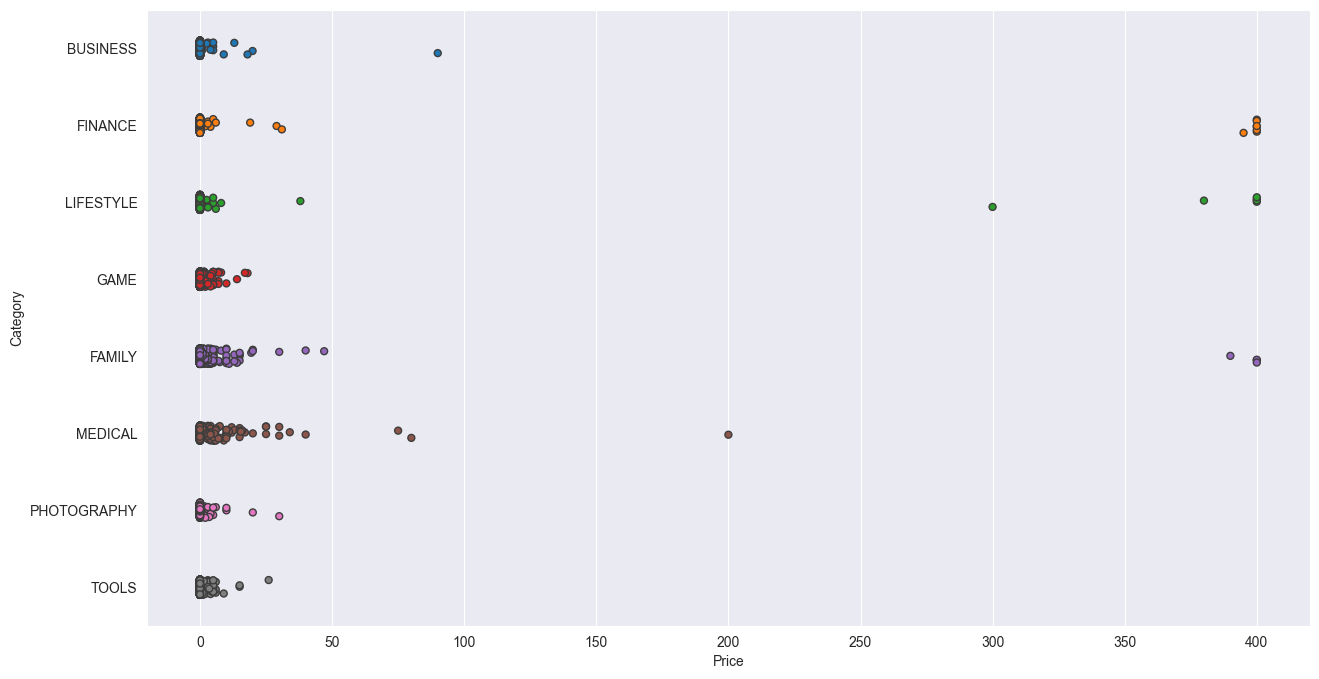

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# select a few popular app categories
popular_app_cats = apps[
    apps.Category.isin(
        ["GAME", "FAMILY", "PHOTOGRAPHY", "MEDICAL", "TOOLS", "FINANCE", "LIFESTYLE", "BUSINESS"]
    )
]

# examine the price trend by plotting `Price` vs `Category`
ax = sns.stripplot(
    x=popular_app_cats["Price"],
    y=popular_app_cats["Category"],
    jitter=True,
    linewidth=1,
    hue=popular_app_cats["Category"],
)

# apps whose `Price` is > 200
apps_above_200 = popular_app_cats[popular_app_cats["Price"] > 200]
display(apps_above_200[["Category", "App", "Price"]])
plt.show()


## Filter out Junk Apps

It looks like a bunch of the really expensive apps are _junk_ apps. That is, apps that don't really have a purpose. Some app developer may create an app called *I Am Rich Premium* or *most expensive app (H)* just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.

Let's filter out these junk apps and re-do our visualization.

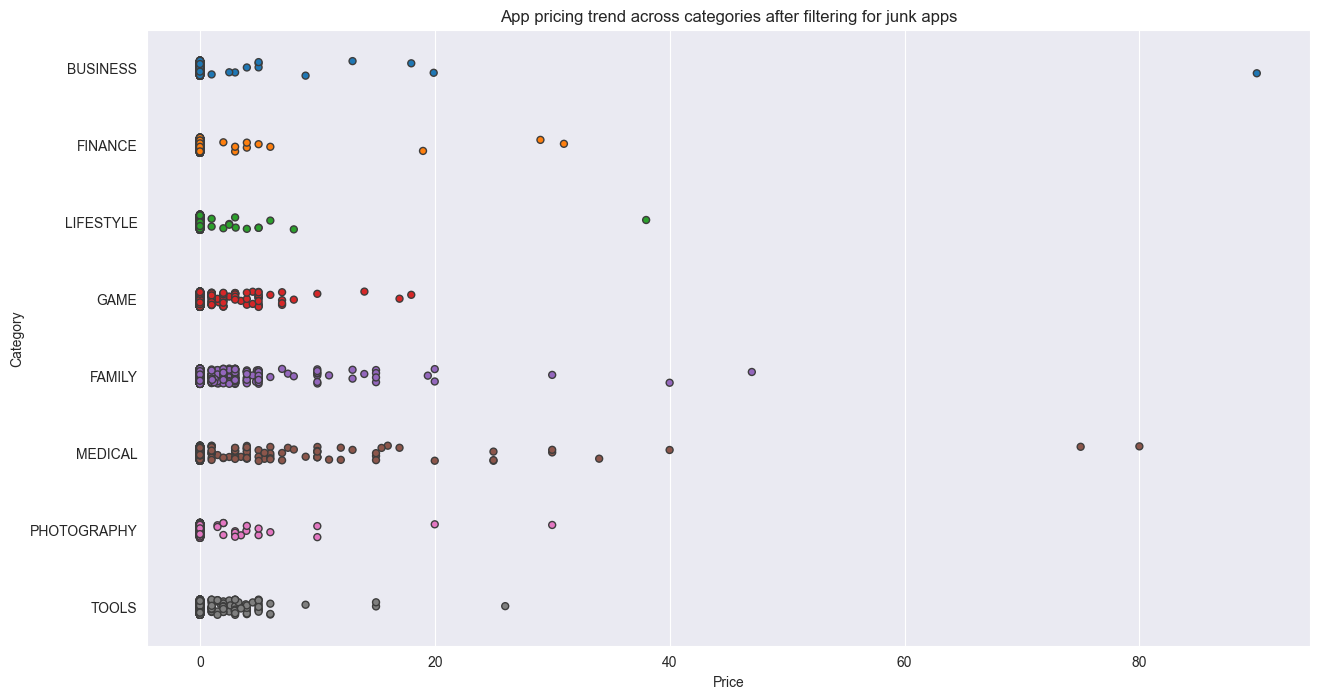

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats["Price"] < 100]

# examine price vs category with the authentic apps
ax = sns.stripplot(
    x="Price", y="Category", data=apps_under_100, jitter=True, linewidth=1, hue="Category"
)
ax.set_title("App pricing trend across categories after filtering for junk apps")
plt.show()


## Popularity of Paid Apps vs Free Apps

For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:
- Free to download.
- Main source of income often comes from advertisements.
- Often created by companies that have other products and the app serves as an extension of those products.
- Can serve as a tool for customer retention, communication, and customer service.

Some characteristics of paid apps are:
- Users are asked to pay once for the app to download and use it.
- The user can't really get a feel for the app before buying it.

Are paid apps installed as much as free apps? It turns out that paid apps have a relatively lower number of installs than free apps, though the difference is not as stark as I would have expected!

In [10]:
# paid apps
trace0 = go.Box(
    y=apps[apps["Type"] == "Paid"]["Installs"],
    name="Paid",
)

# free apps
trace1 = go.Box(
    y=apps[apps["Type"] == "Free"]["Installs"],
    name="Free",
)

# layout
layout = go.Layout(
    title="Number of downloads of paid apps vs. free apps",
    yaxis=dict(title="Log number of downloads", type="log", autorange=True),
)

# data
data = [trace0, trace1]
plotly.offline.iplot({"data": data, "layout": layout})


## Sentiment Analysis of User Reviews

Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as `amazing`, `friendly`, `good`, `great`, and `love`. Negative words might be words like `malware`, `hate`, `problem`, `refund`, and `incompetent`.

By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps, thereby syncing with our previous observation.

In this notebook, we analyzed over ten thousand apps from the Google Play Store. We can use our findings to inform our decisions should we ever wish to create an app ourselves.

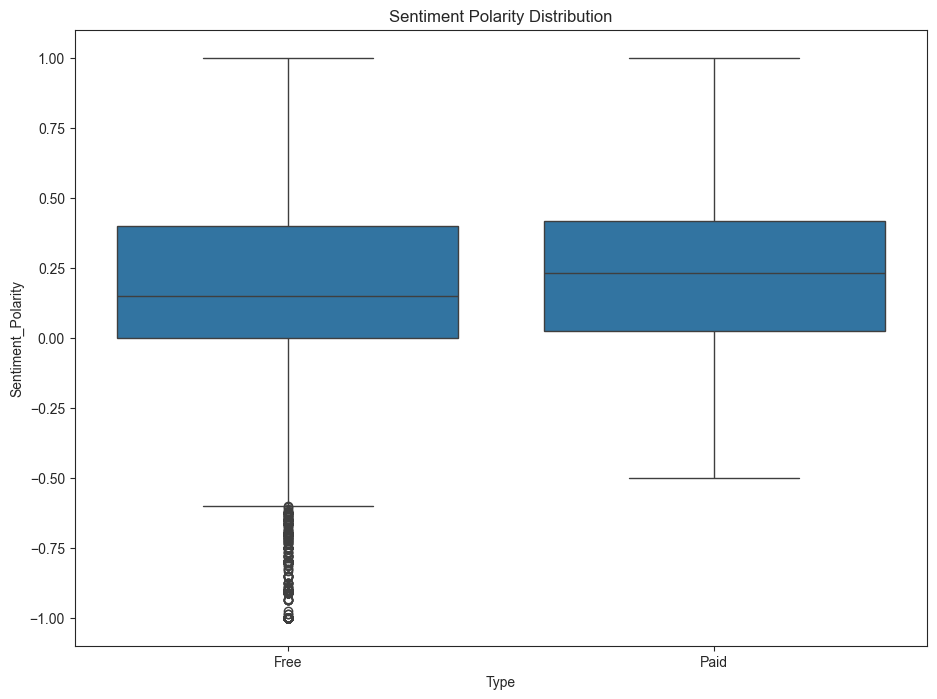

In [11]:
# join the two dataframes
merged_df = pd.merge(apps, reviews, on="App", how="inner")

# drop NA values from `Sentiment` and `Review` columns
merged_df = merged_df.dropna(subset=["Sentiment", "Review"])

sns.set_style("ticks")

fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# user review sentiment polarity for paid vs free apps
ax = sns.boxplot(x="Type", y="Sentiment_Polarity", data=merged_df)
ax.set_title("Sentiment Polarity Distribution")
plt.show()
